# **Generating Fake data for MNIST dataset with Generative Adversarial Network**

 **Importing Libraries**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import adam_v2

In [8]:
img_rows=28
img_cols=28
channels=1

img_shape=(img_rows,img_cols,channels)

zdim=100


Building Generator 

In [9]:
def build_gen(img_shape,zdim):
  model=Sequential()
  model.add(Dense(128,input_dim=zdim))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(28*28*1,activation="tanh"))
  model.add(Reshape(img_shape))
  return model

Building Discriminator 

In [10]:
def build_dis(img_shape):
  model=sequential()
  model.add(Flatten(input_shape=img_shape))
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(1,activation='sigmoid'))
  return model

Building GAN network

In [11]:
def build_gan(gen,dis):
  model=Sequential()
  model.add(gen)
  model.add(dis)
  return model

In [18]:
dis_v=build_dis(img_shape)
dis_v.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
gen_v=build_gen(img_shape,zdim)
dis_v.trainable=False
gan_v=build_gan(gen_v,dis_v)
gan_v.compile(loss="binary_crossentropy",
              optimizer='adam')

In [32]:
losses=[]
accuracies=[]
iteration_checks=[]

def train(iterations,batch_size,interval):
  (Xtrain,_),(_,_)=mnist.load_data()
  Xtrain=(Xtrain)/127.5 - 1.0  #normalization
  Xtrain=np.expand_dims(Xtrain,axis=3)  #6000*28*28*1
  real=np.ones((batch_size,1))  #real images label
  fake=np.zeros((batch_size,1))  #fake images label
  for iteration in range(iterations):
    ids=np.random.randint(0,Xtrain.shape[0],batch_size)
    imgs=Xtrain[ids]

    z=np.random.normal(0,1,(batch_size,100)) #generate random imges
    gen_imgs= gen_v.predict (z)
    dloss_real=dis_v.train_on_batch(imgs,real) 
    dloss_fake=dis_v.train_on_batch(gen_imgs,fake)
    
    dloss, accuracy=0.5* np.add(dloss_real,dloss_fake)

    gloss=gan_v.train_on_batch(z,real)

    if(iteration+1)%interval==0:
      losses.append((dloss,gloss))
      accuracies.append(100.0*accuracy)
      iteration_checks.append(iteration)

      show_images(gen_v)



**Function for showing the generated data**

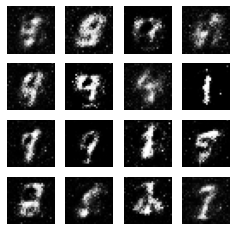

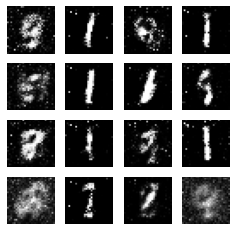

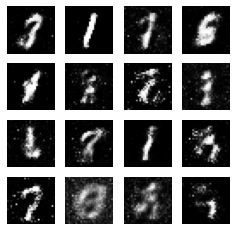

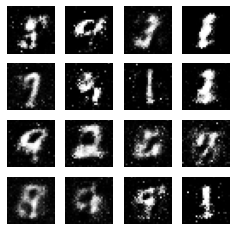

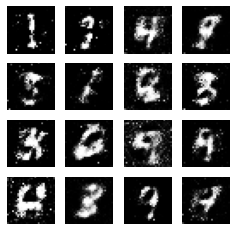

In [35]:
def show_images(gen):
  z=np.random.normal(0,1,(16,100))
  gen_imgs=gen.predict(z)
  gen_imgs=0.5*gen_imgs+0.5
  fig,axs= plt.subplots(4,4,figsize=(4,4),sharey=True,sharex=True)
  cnt=0
  for i in range(4):
    for j in range(4):
      axs[i,j].imshow(gen_imgs[cnt,:,:,0],cmap='gray')
      axs[i,j].axis('off')
      cnt+=1

train(5000,128,1000)

